<a href="https://colab.research.google.com/github/hashemi124/ANN_edu_deep/blob/master/mvision_cal101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#from keras.datasets import mnist
from keras import *
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam,SGD
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
import glob
from skimage import io
import os
import scipy.misc
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import SGD
from keras import regularizers
import csv
from keras.applications.inception_v3 import InceptionV3, preprocess_input

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
datasets_path = '/content/drive/My Drive/Colab Notebooks/Caltech101/train' #Add the path to the unzipped folder

def load_images(path,n=0):
    X = []
    Y=[]
    i=-1
    labels = []
    for label in os.listdir(path):
        back_path = os.path.join(path,label)
        labels.append(label)
        i = i+1
        for filename in os.listdir(back_path):
            image_path = os.path.join(back_path,filename)
            img = image.load_img(image_path,target_size=(32,32))
            img = image.img_to_array(img)
            #Y.append(image)
            #image = imresize(image,[128,128,3])
            #image = imresize(imread(image_path), [128,128, 3])
            #image = image.astype('float32')
            img[:,:,0] -= 123.68
            img[:,:,1] -= 116.78
            img[:,:,2] -= 103.94
            #image = image/255
            #image = 1-image
            Y.append(i)
            X.append(img)
            #X.append(image.img_to_array(img))
            #X.append(image)
    return X,Y,labels

x_train,y,label_data = load_images(datasets_path)
X = np.array(x_train)
#print(len(x_train))
#print(x_train.shape)
Y = np.array(y)
print(X.shape)

(450, 32, 32, 3)


In [4]:
datasets_path = '/content/drive/My Drive/Colab Notebooks/Caltech101/test' #Add the path to the unzipped folder

def load_images(path,n=0):
    X = []
    Y=[]
    i=-1
    labels = []
    for label in os.listdir(path):
        back_path = os.path.join(path,label)
        labels.append(label)
        i = i+1
        for filename in os.listdir(back_path):
            image_path = os.path.join(back_path,filename)
            img = image.load_img(image_path,target_size=(32,32))
            img = image.img_to_array(img)
            #Y.append(image)
            #image = imresize(image,[128,128,3])
            #image = imresize(imread(image_path), [128,128, 3])
            #image = image.astype('float32')
            img[:,:,0] -= 123.68
            img[:,:,1] -= 116.78
            img[:,:,2] -= 103.94
            #image = image/255
            #image = 1-image
            Y.append(i)
            X.append(img)
            #X.append(image.img_to_array(img))
            #X.append(image)
    return X,Y,labels

x,y,label_data = load_images(datasets_path)
X_test= np.array(x)
#print(len(x_train))
#print(x_train.shape)
Y_test = np.array(y)
print(X_test.shape)

(2856, 32, 32, 3)


In [5]:
print("Shape of training data:")
print(X.shape)
print(Y.shape)
print("Shape of test data:")
print(X_test.shape)
print(Y_test.shape)

Shape of training data:
(450, 32, 32, 3)
(450,)
Shape of test data:
(2856, 32, 32, 3)
(2856,)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


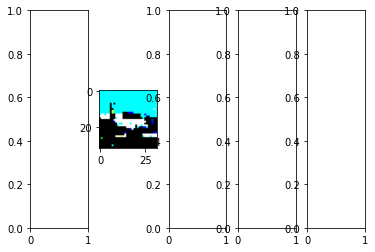

In [6]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(1, 5)
axarr[1].imshow(X[11])
#plt.show()

In [7]:
from keras.utils.np_utils import to_categorical   

In [8]:
y_train = to_categorical(Y, num_classes=15)
y_test = to_categorical(Y_test, num_classes=15)
X_train = X.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


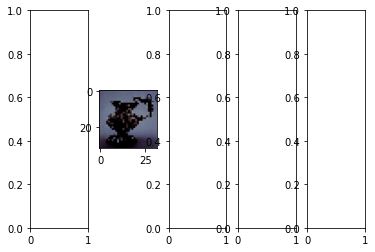

In [9]:
f, axarr = plt.subplots(1, 5)
axarr[1].imshow(X_train[160])
#plt.show()

In [10]:
print("Shape of training data:")
print(X_train.shape)
print(y_train.shape)
print("Shape of test data:")
print(X_test.shape)
print(y_test.shape)

Shape of training data:
(450, 32, 32, 3)
(450, 15)
Shape of test data:
(2856, 32, 32, 3)
(2856, 15)


In [11]:


model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layer added here
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
# Dropout layer added here
model.add(Dropout(0.5))
model.add(Dense(15, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

In [13]:
history = model.fit(X_train, y_train, batch_size=32, epochs=50, verbose=2, validation_split=0.2)

Train on 360 samples, validate on 90 samples
Epoch 1/50
 - 1s - loss: 0.4434 - accuracy: 0.8750 - val_loss: 9.4588 - val_accuracy: 0.0000e+00
Epoch 2/50
 - 1s - loss: 0.3389 - accuracy: 0.9167 - val_loss: 9.5314 - val_accuracy: 0.0000e+00
Epoch 3/50
 - 1s - loss: 0.2875 - accuracy: 0.9083 - val_loss: 10.2196 - val_accuracy: 0.0000e+00
Epoch 4/50
 - 1s - loss: 0.2419 - accuracy: 0.9306 - val_loss: 9.7977 - val_accuracy: 0.0000e+00
Epoch 5/50
 - 1s - loss: 0.1899 - accuracy: 0.9389 - val_loss: 10.6214 - val_accuracy: 0.0000e+00
Epoch 6/50
 - 1s - loss: 0.1833 - accuracy: 0.9306 - val_loss: 11.2835 - val_accuracy: 0.0000e+00
Epoch 7/50
 - 1s - loss: 0.1471 - accuracy: 0.9639 - val_loss: 11.4668 - val_accuracy: 0.0000e+00
Epoch 8/50
 - 1s - loss: 0.1040 - accuracy: 0.9750 - val_loss: 13.0013 - val_accuracy: 0.0000e+00
Epoch 9/50
 - 1s - loss: 0.0932 - accuracy: 0.9806 - val_loss: 13.1061 - val_accuracy: 0.0000e+00
Epoch 10/50
 - 1s - loss: 0.1027 - accuracy: 0.9556 - val_loss: 12.9143 - va

In [16]:
def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

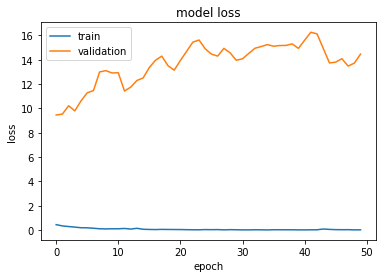

In [17]:
plotLosses(history)